# Predicting customer churn

### Task: Analyze and prepare a customer retention action plan of clients gym.

## Step 1 - Import and Explore

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df_gym = pd.read_csv('gym_churn.csv')

In [3]:
df_gym.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


## Step 2. EDA

In [4]:
df_gym.columns = df_gym.columns.str.lower()

In [5]:
df_gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [6]:
df_gym.duplicated().sum()

0

In [7]:
#the mean values and standard deviations
df_gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


- The number of men and women among the clients of the fitness club is approximately the same;
- 85% of clients live or work near a fitness club;
- Almost 50% of clients are employees of the club's partner companies;
- Within the framework of the promotion ("Bring a friend"), 30% of clients came;
- The database contains phone numbers for about 90% of clients;
- Average duration of customer subscriptions - 4.6 months;
- 41% of clients attend group classes;
- The average age of clients is 29 years;
- Average revenue from other services of the fitness club - 146;
- The average period until the end of the current valid subscription is 4.3 months;
- Average time since the first visit to the fitness center - 3.7 months;
- Average frequency of visits per week for the entire time since the beginning of the subscription - 1.87 times a week;
- Average frequency of visits per week for the previous month - 1.76 times per week;
- Average churn rate - 27%.

In [8]:
df_churn = df_gym.groupby('churn').mean()
df_churn

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Далее строим гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).

In [9]:
dict_distplot = {
    'avg_additional_charges_total': 'Выручка от доп. услуг',
    'month_to_end_contract': 'Срок до окончания абонемента, мес.',
    'lifetime': 'Среднее время с момента первого обращения в фитнес-центр',
    'avg_class_frequency_total': 'Средняя частота посещений за все время',
    'avg_class_frequency_current_month': 'Недельная частота посещения за месяц',
    'contract_period': 'Срок абонемента, мес.',
    'age': 'Возраст'
}

In [10]:
dict_plt = {
    'gender': 'Пол',
    'near_location': 'Близкое расположение зала',
    'partner': 'Скидка партнера',
    'promo_friends': 'Промокод друга',
    'phone': 'Оставлен номер телефона',
    'group_visits': 'Групповые занятия',
    'churn': 'Отток'
    
}

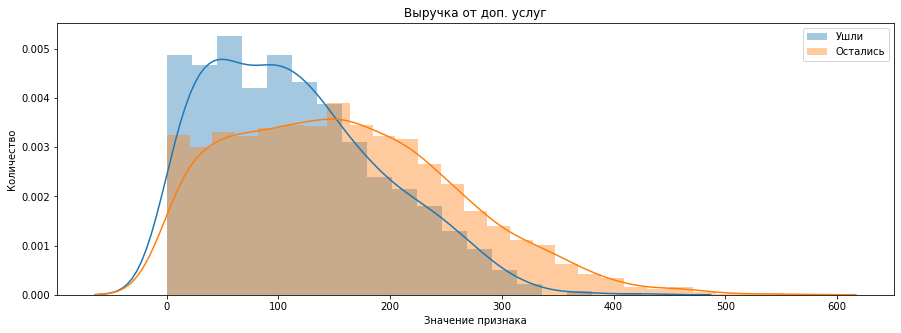

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


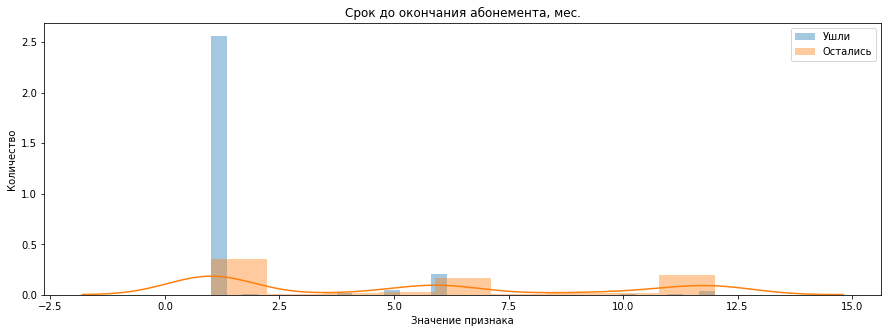

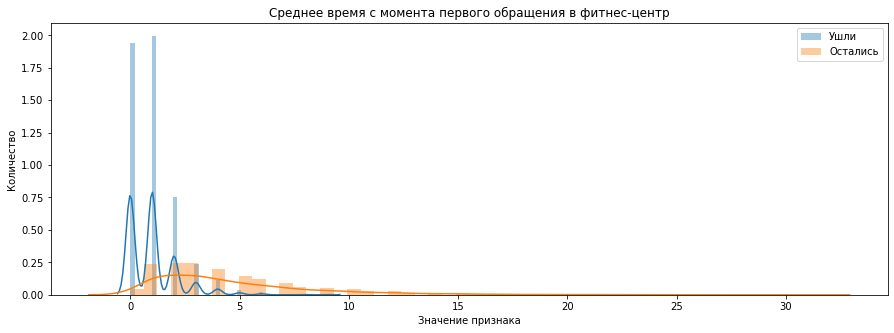

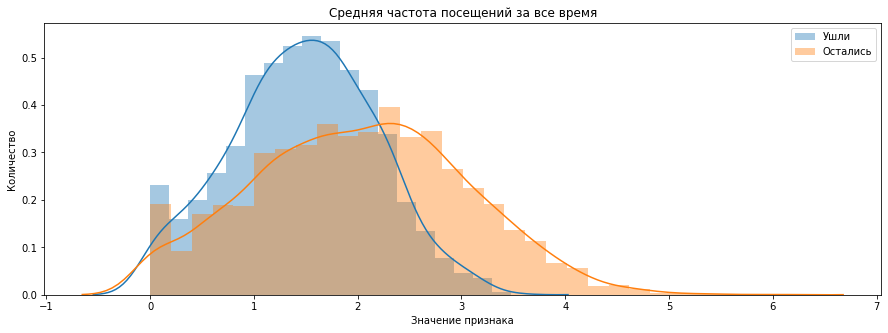

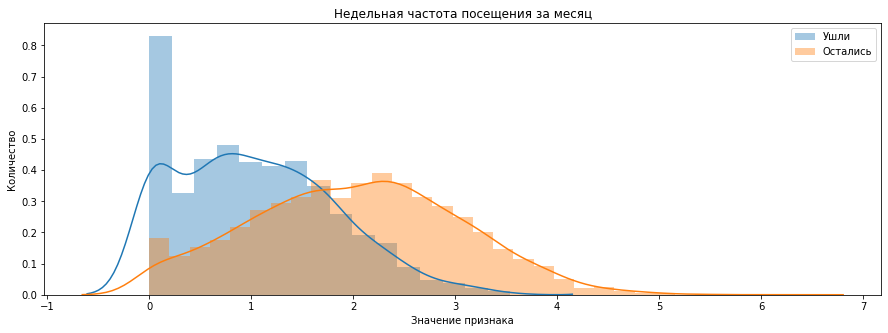

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


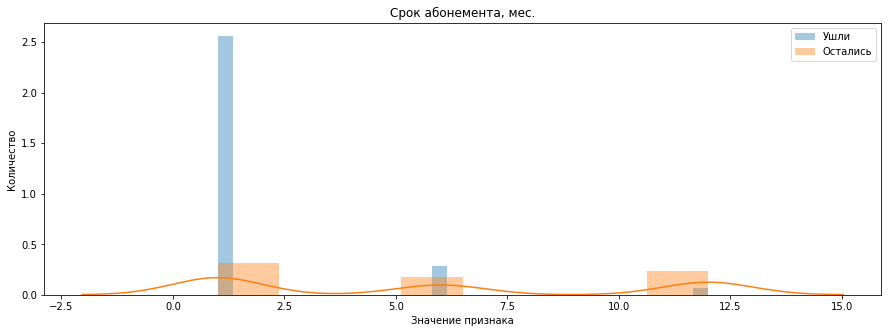

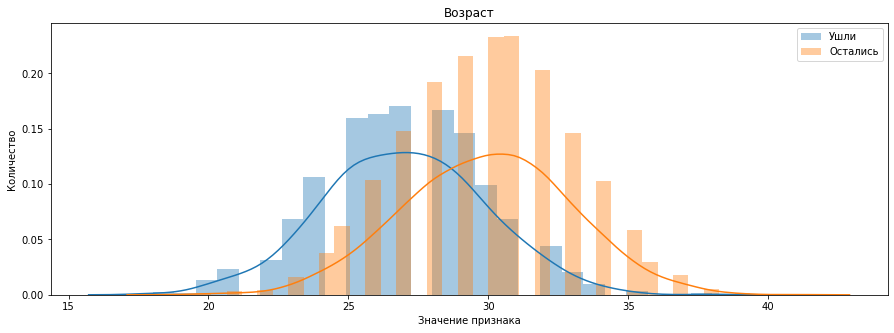

In [11]:
left = df_gym[df_gym['churn']==1]
stayed = df_gym[df_gym['churn']==0]
distplot_list = dict_distplot 
for column in distplot_list: 
    plt.figure(figsize=(15,5)) 
    plt.title(dict_distplot[column])
    sns.distplot(left[column])
    sns.distplot(stayed[column])
    plt.ylabel('Количество')
    plt.xlabel('Значение признака')
    plt.legend(['Ушли', 'Остались'])
    plt.show()

In [12]:
df_countplot = df_gym.loc[:, ['gender', 'near_location', 'partner','promo_friends', 'phone', 'group_visits','churn' ]]

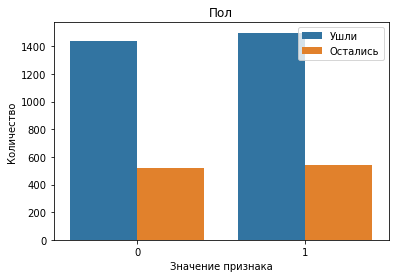

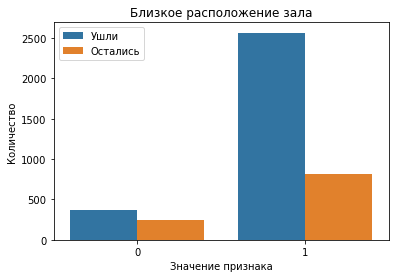

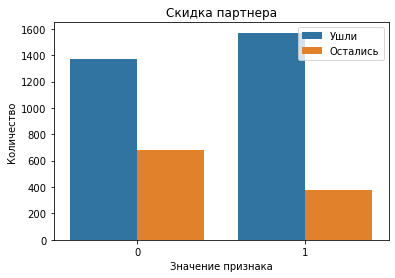

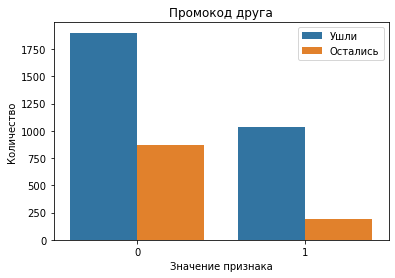

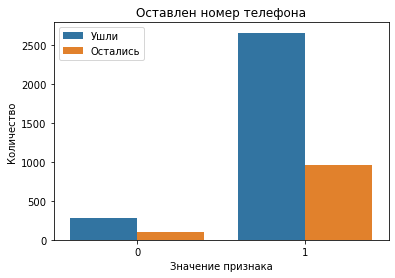

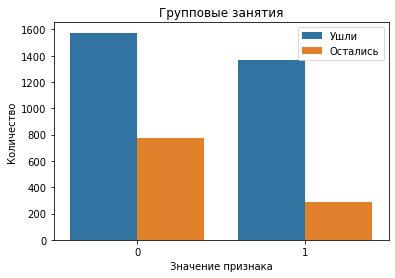

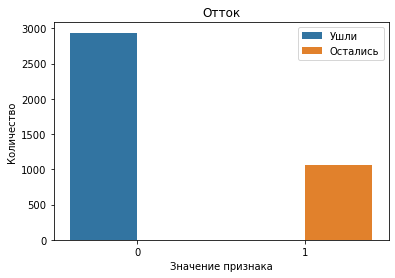

In [13]:
for i, col in enumerate(df_countplot.columns):
        plt.figure(i)
        sns.countplot(x = col, hue = "churn", data = df_countplot)
        plt.title(dict_plt[col])
        plt.legend(['Ушли', 'Остались'])
        plt.ylabel('Количество')
        plt.xlabel('Значение признака')

In [14]:
viz_data = df_gym.pivot_table(index='churn', columns='contract_period', values='age', aggfunc='count')

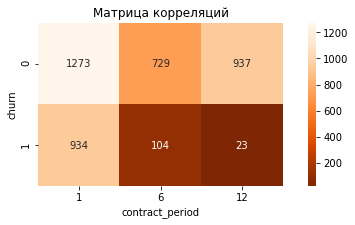

In [15]:
plt.subplots(figsize=(9, 3))
sns.heatmap(viz_data, square = True, annot = True, fmt='.0f', cmap='Oranges_r')
plt.title('Матрица корреляций')
plt.show()

<hr style="border: 2px solid orange;" />

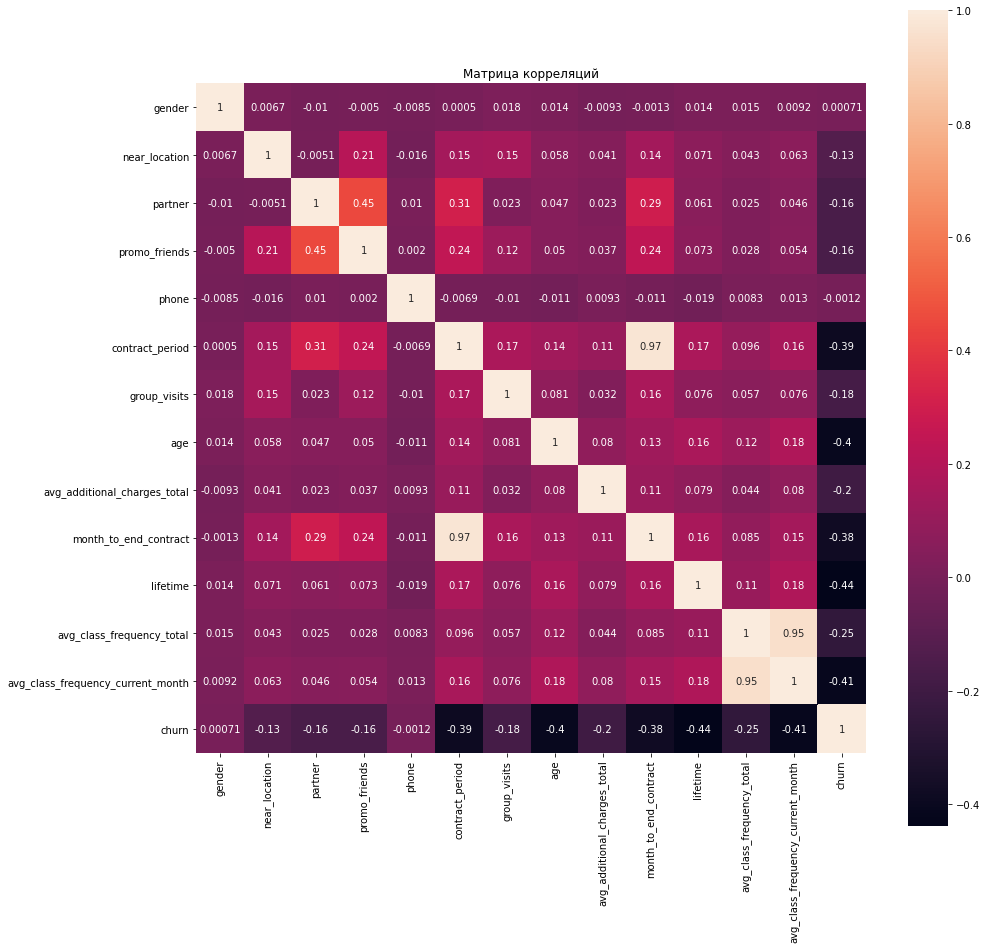

In [16]:
corr =  df_gym.corr() 
plt.subplots(figsize=(15, 15))
sns.heatmap(corr, square = True, annot = True)
plt.title('Матрица корреляций')
plt.show()

### Conclusion: 

- there is no dependence between the departure of the client and his gender or the presence of his phone in the client base;
- there is a connection between the client's departure and whether the client was an employee of the partner company, whether he came under the "bring a friend" campaign or not, whether he lives / works near the center and attends group classes;
- the churn of customers can be observed among short subscriptions (1 month);
- the frequency of visiting the hall among those who left was on average lower than among those who remained;
- departed clients are on average younger than the remaining ones;
- on average, spending on additional services is lower for departed customers.

A strong correlation is observed for features that are interrelated:
- "Term until the end of the subscription" (month_to_end_contract) and "Term of the subscription" (contract_period);
- “Weekly frequency of visits per month” (avg_class_frequency_current_month) and “Average frequency of visits for all time” (avg_class_frequency_total).

## Шаг 3. Hyperparameter Tuning and Model Selection

In [17]:
#a function that will output our metrics
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [18]:
#dividing the data into features (matrix X) and target variable (y)
X = df_gym.drop('churn', axis = 1)
y = df_gym['churn'] 

#dividing the model into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#StandartScaler
scaler = StandardScaler()
scaler.fit(X_train)

#transformation of training and validation datasets
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [19]:
#model for logistic regression 
lr_model = LogisticRegression(random_state=0)

#model training
lr_model.fit(X_train_st, y_train)

#forecasts
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]


print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Metrics for the Logistic Regression Model:')

Metrics for the Logistic Regression Model:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
	F1: 0.84
	ROC_AUC: 0.97


In [20]:
#algorithm for new model based on random forest algorithm
rf_model = RandomForestClassifier(n_estimators = 100, random_state=0) # Ваш код здесь

#model training
rf_model.fit(X_train_st, y_train)

#forecasts
rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1] 


print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Metrics for the random forest model:')

Metrics for the random forest model:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81
	F1: 0.83
	ROC_AUC: 0.97


## Шаг 4. Clustering clients

In [21]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)
linked = linkage(X_sc, method = 'ward')

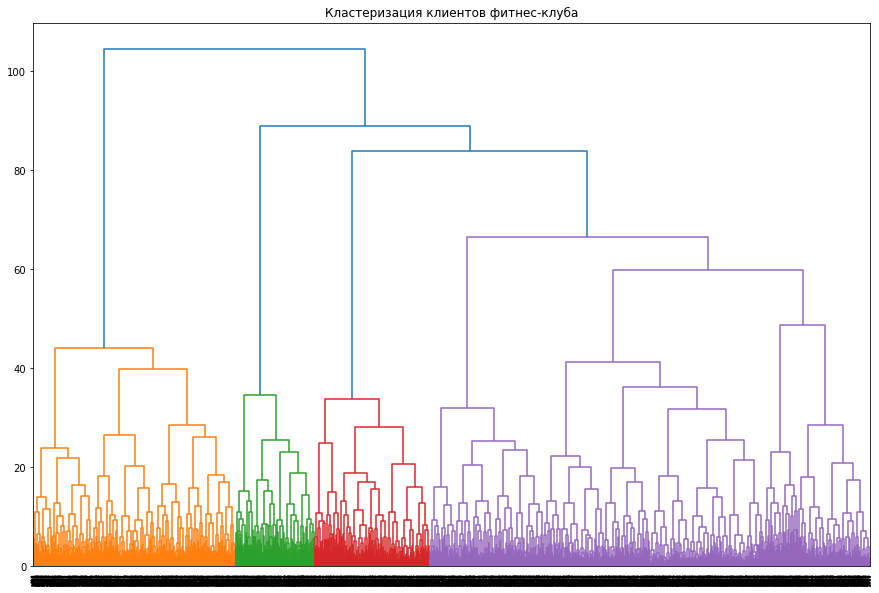

In [22]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация клиентов фитнес-клуба')
plt.show()

Training a clustering model based on the K-Means algorithm.

In [23]:
#k_means clusters = 5
km = KMeans(n_clusters = 5, random_state = 0)


labels = km.fit_predict(X_sc)
X['cluster_km'] = labels 

df_gym['cluster_km'] = labels

In [24]:
clusters = df_gym.groupby('cluster_km').mean()
clusters

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
1,0.480787,0.812559,0.000000,0.086223,1.000000,1.866917,0.325211,28.145267,131.369042,1.791003,2.345829,1.325865,1.086883,0.550141
2,0.559567,0.858002,0.338147,0.197353,0.998797,2.730445,0.448857,30.196149,164.579011,2.519856,5.010830,2.928140,2.934140,0.048135
3,0.509603,0.750320,1.000000,0.451985,1.000000,2.554417,0.303457,28.499360,129.812508,2.370038,2.832266,1.355379,1.176172,0.395647
4,0.495726,0.943376,0.752137,0.541667,1.000000,11.352564,0.564103,29.993590,164.563799,10.376068,4.817308,2.028169,2.020129,0.023504


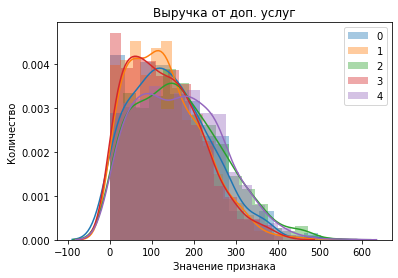

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


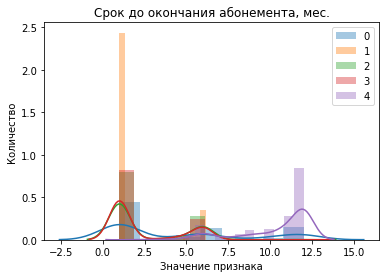

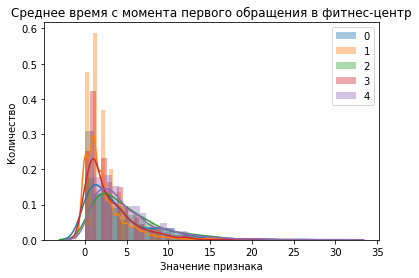

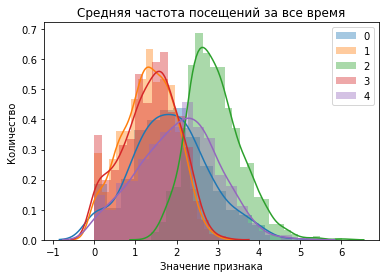

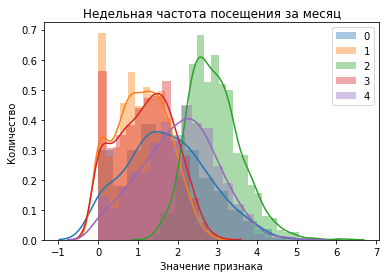

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


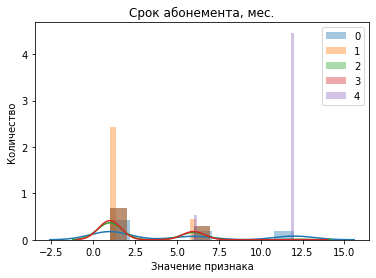

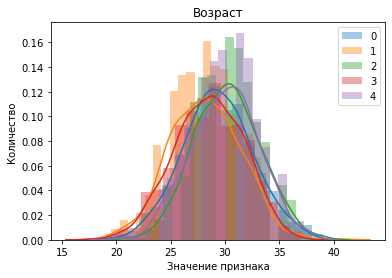

In [25]:
final_distplot_list = dict_distplot
for column in final_distplot_list: 
    for cluster in range(0,5):
        sns.distplot(df_gym[df_gym['cluster_km'] == cluster][column], kde = True, label=cluster)
    
    plt.title(dict_distplot[column])
    plt.ylabel('Количество')
    plt.xlabel('Значение признака')
    plt.legend()
    plt.show()
    

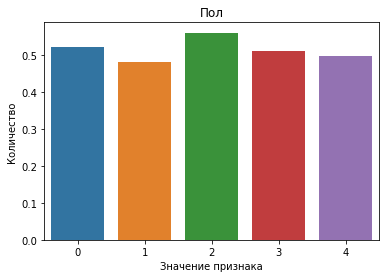

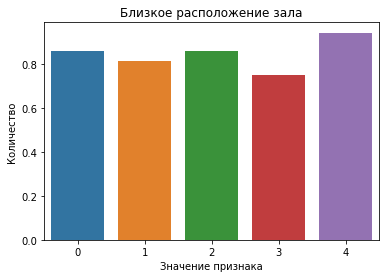

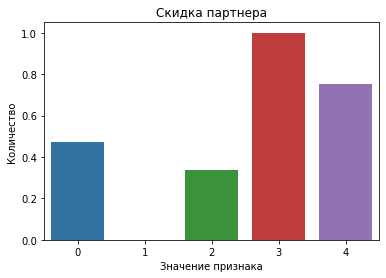

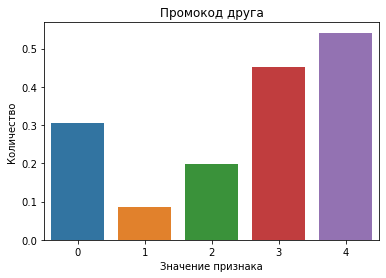

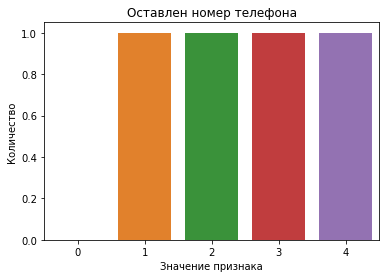

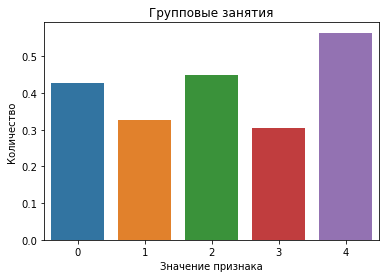

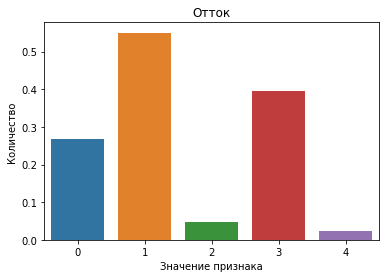

In [26]:
data = clusters.reset_index()
final_plt_list = dict_plt
for column in final_plt_list:
    sns.barplot(x = 'cluster_km', y = column, data = data)
    plt.title(dict_plt[column])
    plt.ylabel('Количество')
    plt.xlabel('Значение признака')    
    plt.show()

Clients with the shortest previously purchased subscriptions go out faster than clients with long term subscriptions. The location of the fitness club also plays an important role.

In [27]:
df_gym.groupby('cluster_km').agg({'churn': 'mean'}).applymap("{0:.2%}".format)

,churn
cluster_km,
0,26.75%
1,55.01%
2,4.81%
3,39.56%
4,2.35%


The third cluster is most prone to churn, where more than half of the clients left. Clients from the 2nd cluster are also prone to churn (44%). It is possible, if measures are taken, to improve the picture of the 1st cluster and retain more customers, here the churn is almost 27%. For the 4th and 0th, the situation is the best: here the churn is only 7 and 3%.

## General conclusions

Revealed the following:
- the ratio of men and women in a fitness club is approximately the same;
- the average age of the client is 29 years;
- Average duration of customer subscriptions - 4.6 months;
- the average frequency of visits per week for the previous month - 1.76 times a week;
- there is no dependence between the departure of the client and his gender or the presence of his phone in the client base;
- there is a connection between the client's departure and whether the client was an employee of the partner company, whether he came for the "bring a friend" campaign or not, whether he lives / works near the center and attends group classes.

After constructing the correlation matrix, it was found that a strong correlation is observed for the signs that are interrelated: "The period until the end of the subscription" and "The duration of the membership"; "Weekly frequency of visits per month" and "Average frequency of visits for all time".

In the course of training the model, the logistics regression model showed the best results.

When clustering the model based on the K-Means algorithm, 5 clusters were obtained. Based on them, we can draw the following conclusions: the third and second (51% and 44%, respectively) clusters are most susceptible to outflow, the first cluster is at an intermediate level (27% of the outflow). For the 5th cluster the churn is 7% and for the 0th 3%.

For clients who most often go to churn, we can draw the following portrait:
- live / work nearby;
- membership period is 1 month;
- are not employees of partner companies;
- did not come for a promotion;
- do not use add. club services;
- the average age of the client is 28 years (on average, younger than the others).

For clients who stay:
- live / work nearby;
- membership period is up to 12 months;
- are employees of partner companies;
- came from a promotion;
- use add. club services;
- the average age of the client is 30 years.

##### Development and retention guidelines

As we found out, the bulk of the churn is made up of customers with a membership period of 1 month, for them it is worth entering some additional conditions, for example:
- interest-free installments when buying a membership;
- discounts for additional services;
- several free lessons with a trainer.

You should also pay more attention to the various promotions, because the bulk of customers who left did not take advantage of the promotions. Perhaps it is worth paying attention to the age segment, and for young people under the age of 27-28, introduce additional discounts.

To retain existing customers, I can also recommend discounts and promotions for additional services of the club: classes with a trainer, a fitness bar, discounts for renewing a membership, etc.